In [13]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns

from alignment import TrivialAlignment, CCA, ManifoldLinear, manifold_nonlinear
from correspondence import Correspondence
from distance import SquaredL2
from neighborhood import neighbor_graph
from util import pairwise_error, Timer
from viz import show_alignment
from warping import manifold_warping_linear

from rpy2.robjects import r
import rpy2.robjects.pandas2ri as pandas2ri

In [2]:
file = "../../data/OrthoExpr.RData"
rf = r['load'](file)

dayExpr = pandas2ri.ri2py_dataframe(r['dayOrthoExpr'])
nightExpr = pandas2ri.ri2py_dataframe(r['nightOrthoExpr'])

X = dayExpr.as_matrix()
Y = nightExpr.as_matrix()
n = 972
d = 3

In [15]:
X_normalized = preprocessing.normalize(X, norm='l2').T
Y_normalized = preprocessing.normalize(Y, norm='l2')[0:13, :].T

corr = Correspondence(matrix=np.eye(n))
Wx = neighbor_graph(X_normalized, k=5)
Wy = neighbor_graph(Y_normalized, k=5)

In [4]:
lin_aligners = (
    ('cca', lambda: CCA(X_normalized, Y_normalized, corr, d)),
    ('linear manifold', lambda: ManifoldLinear(X_normalized, Y_normalized, corr, d, Wx, Wy)),
)

cca : 0.077 seconds
 sum sq. error = 5.4343698815776555
linear manifold : 0.135 seconds
 sum sq. error = 9.025406287036123


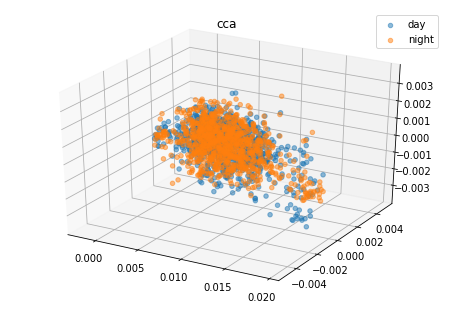

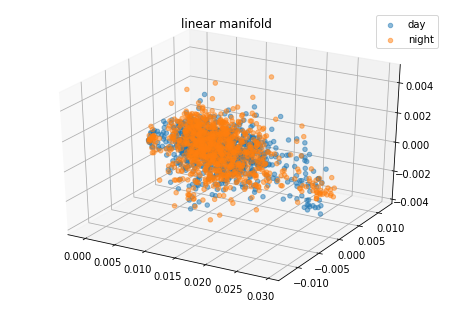

In [5]:
for name, aln in lin_aligners:
    pyplot.figure()
    with Timer(name):
        Xnew, Ynew = aln().project(X_normalized, Y_normalized)
    print (' sum sq. error =', pairwise_error(Xnew, Ynew, metric=SquaredL2))
    show_alignment(Xnew, Ynew, 'day', 'night', name)
    pyplot.draw()

<function matplotlib.pyplot.show>

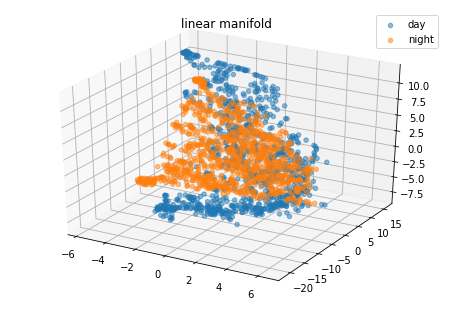

In [7]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3, perplexity=50).fit_transform(X_normalized)
Y_embedded = TSNE(n_components=3, perplexity=50).fit_transform(Y_normalized)
show_alignment(X_embedded, Y_embedded, 'day', 'night', name)

<function matplotlib.pyplot.show>

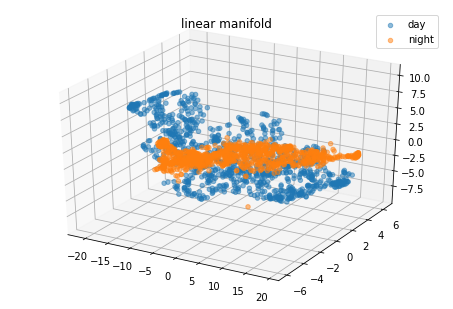

In [8]:
X_embedded = TSNE(n_components=3, perplexity=50, n_iter=500).fit_transform(X_normalized)
Y_embedded = TSNE(n_components=3, perplexity=50, n_iter=500).fit_transform(Y_normalized)
show_alignment(X_embedded, Y_embedded, 'day', 'night', name)

<function matplotlib.pyplot.show>

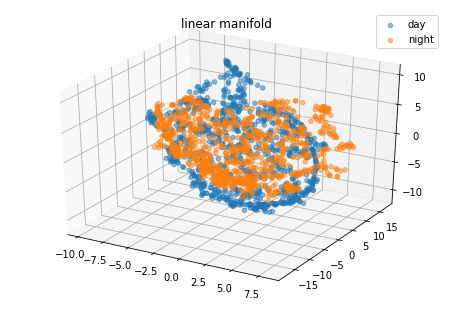

In [9]:
X_embedded_ = TSNE(n_components=3, perplexity=30).fit_transform(Xnew)
Y_embedded_ = TSNE(n_components=3, perplexity=30).fit_transform(Ynew)
show_alignment(X_embedded_, Y_embedded_, 'day', 'night', name)

<function matplotlib.pyplot.show>

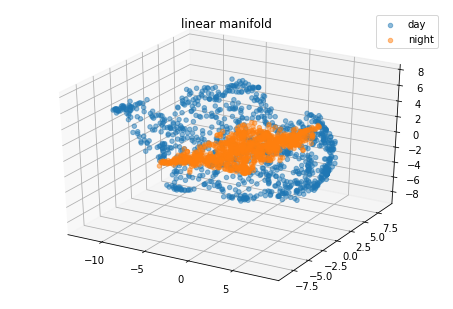

In [10]:
X_embedded_ = TSNE(n_components=3, perplexity=50).fit_transform(Xnew)
Y_embedded_ = TSNE(n_components=3, perplexity=50).fit_transform(Ynew)
show_alignment(X_embedded_, Y_embedded_, 'day', 'night', name)

<function matplotlib.pyplot.show>

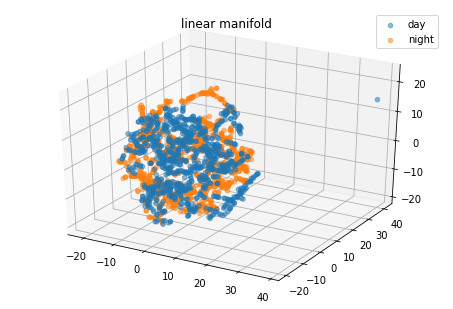

In [11]:
X_embedded = TSNE(n_components=3, perplexity=5, n_iter=500).fit_transform(X_normalized)
Y_embedded = TSNE(n_components=3, perplexity=5, n_iter=500).fit_transform(Y_normalized)
show_alignment(X_embedded, Y_embedded, 'day', 'night', name)

<function matplotlib.pyplot.show>

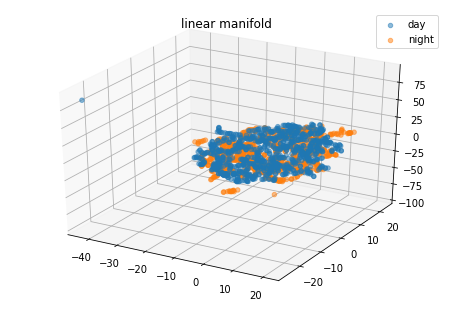

In [12]:
X_embedded_ = TSNE(n_components=3, perplexity=5, n_iter=500).fit_transform(Xnew)
Y_embedded_ = TSNE(n_components=3, perplexity=5, n_iter=500).fit_transform(Ynew)
show_alignment(X_embedded_, Y_embedded_, 'day', 'night', name)

In [14]:
file = "../../data/expr.RData"
rf = r['load'](file)

dayExpr = pandas2ri.ri2py_dataframe(r['dayExpr'])
nightExpr = pandas2ri.ri2py_dataframe(r['nightExpr'])

X = dayExpr.as_matrix()
Y = nightExpr.as_matrix()
n = 17695
d = 3

In [16]:
lin_aligners = (
    ('no alignment', lambda: TrivialAlignment(X_normalized, Y_normalized, d)),
    ('cca', lambda: CCA(X_normalized, Y_normalized, corr, d)),
    ('linear manifold', lambda: ManifoldLinear(X_normalized, Y_normalized, corr, d, Wx, Wy)),
)

In [19]:
disMat = np.empty((0,313113025), float)
metric = SquaredL2

no alignment : 0.001 seconds
 sum sq. error = 1010.1441564836526
cca : 22.836 seconds
 sum sq. error = 454.9137760775018
linear manifold : 64.872 seconds
 sum sq. error = 127.99525660815291


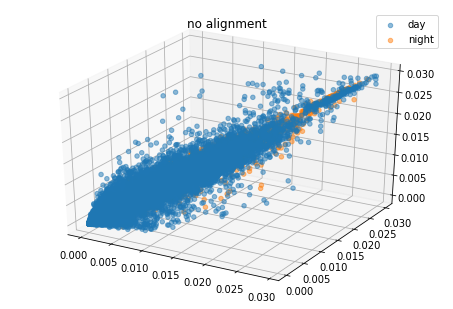

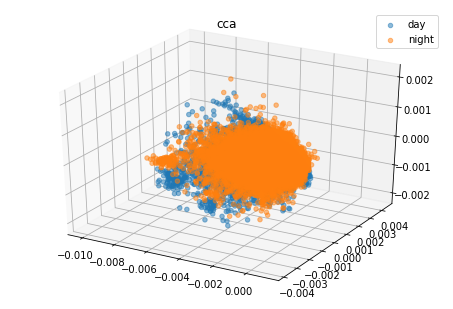

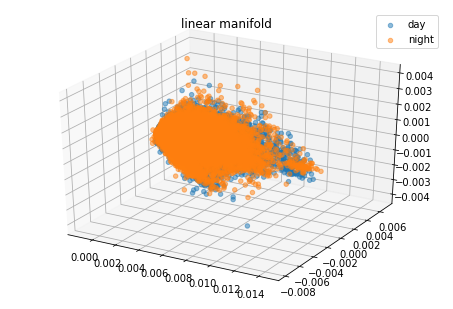

In [20]:
for name, aln in lin_aligners:
    pyplot.figure()
    with Timer(name):
        Xnew, Ynew = aln().project(X_normalized, Y_normalized)
    print (' sum sq. error =', pairwise_error(Xnew, Ynew, metric=SquaredL2))
    show_alignment(Xnew, Ynew, 'day', 'night', name)
    pyplot.draw()
    disMat = np.vstack((disMat, metric.between(Xnew/Xnew.max(), Ynew/Ynew.max()).flatten()))

In [22]:
disMat.shape

(3, 313113025)